# Custos de mandato - BeautifulSoup

O dados abaixo foram obtidos através do site (http://www.camara.sp.gov.br/transparencia/custos-de-mandato/) clicando no primeiro link 'Clique aqui e saiba como o seu vereador utiliza o Auxílio-Encargo Geral (a partir de 2015)', que por sua vez abrirá 'RELATÓRIO POR NATUREZA DE DESPESA (A PARTIR DE 2015)'.

O Relatório referente ao mês de janeiro de 2017 será a fonte dos códigos abaixo.

In [4]:
import requests

# este pacote pega os elementos em html e transforma em pequenos objetos do python
from bs4 import BeautifulSoup

requisicao = requests.get('https://sisgvarmazenamento.blob.core.windows.net/prd/PublicacaoPortal/Arquivos/201701.htm')

# verificar se as informações estão corretas - são todas as informações da pg em html de uma única vez
requisicao.content

b'<HTML>\r\n  <HEAD>\r\n    <META http-equiv="Content-Type" content="text/html; charset=utf-16">\r\n    <meta http-equiv="cache-control" content="max-age=0">\r\n    <meta http-equiv="cache-control" content="no-cache">\r\n    <meta http-equiv="expires" content="0">\r\n    <meta http-equiv="expires" content="Tue, 01 Jan 1980 1:00:00 GMT">\r\n    <meta http-equiv="pragma" content="no-cache">\r\n    <STYLE>\n          body, table\n          {\n          font-family: Arial, Verdana, Sans-serif;\n          font-weight: normal;\n          font-size: 12px;\n          }\n          h1\n          {\n          font-family: Arial, Verdana, Sans-serif;\n          font-weight: bold;\n          font-size: 16px;\n          text-align: center;\n          }\n          h2\n          {\n          font-family: Arial, Verdana, Sans-serif;\n          font-weight: bold;\n          font-size: 12px;\n          text-align: center;\n          }\n          h3 {\n          font-family: Arial, Verdana, Sans-serif;\n 

In [6]:
# o BeautifulSoup irá ler e entender que o conteúdo é um html devido ao parser
# toda a informação acima será organizada em objetos menore e dicionários, tornando fácil a busca em anotações do python
sopa = BeautifulSoup(requisicao.content, 'html.parser')

In [7]:
# é feito uma busca sobre a tag h1 que retornará a string relacionada a ele
sopa.find('h1')

<h1>
                        CÂMARA MUNICIPAL DE SÃO PAULO<br/></h1>

In [8]:
# somente o texto
sopa.find('h1').text

'\r\n                        CÂMARA MUNICIPAL DE SÃO PAULO'

In [9]:
# tabela com uma classe específica de um bloco
sopa.find('table', {'class': 'bloco'})

<table border="0" class="bloco" width="100%">
<tr>
<td>
<p class="itembusca"><b>
                        Vereador(a): ABOU ANNI</b></p>
</td>
</tr>
<tr>
<td>
<table align="center" border="1" width="100%">
<tr>
<td colspan="2">Natureza da despesa</td>
<td>Valor utilizado</td>
</tr>
<tr>
<td colspan="3">COMBUSTIVEL</td>
</tr>
<tr>
<td width="15%">43.900.851/0001-01</td>
<td width="60%">PROTOTIPO AUTO POSTO LTDA.</td>
<td align="RIGHT" width="20%">880,00</td>
</tr>
<tr>
<td align="RIGHT" colspan="2">TOTAL DO ITEM</td>
<td align="RIGHT">880,00</td>
</tr>
<tr>
<td colspan="3">INTERMEDIADO - CORREIOS</td>
</tr>
<tr>
<td width="15%">50.176.288/0001-28</td>
<td width="60%">CAMARA MUNICIPAL DE SÃO PAULO</td>
<td align="RIGHT" width="20%">5.993,27</td>
</tr>
<tr>
<td align="RIGHT" colspan="2">TOTAL DO ITEM</td>
<td align="RIGHT">5.993,27</td>
</tr>
<tr>
<td colspan="3">MATERIAL DE ESCRITORIO E OUTROS MATERIAIS DE CONSUMO</td>
</tr>
<tr>
<td width="15%">06.226.820/0001-82</td>
<td width="60%">CEN

In [10]:
bloco = sopa.find('table', {'class': 'bloco'})
bloco.find('p').text.strip() # strip elimina o espaço em branco de um texto antes e depois da string

'Vereador(a): ABOU ANNI'

In [14]:
# elemento 6 da lista é o vereador em questão
blocos[6].find('p').text.strip()

'Vereador(a): ANDRÉ SANTOS'

In [15]:
# para cada linha será puxado o vereador que está dentro do elemento p
blocos = sopa.find_all('table', {'class': 'bloco'})
for linha in blocos:
    vereador = linha.find('p').text.strip()
    print(vereador)

Vereador(a): ABOU ANNI
Vereador(a): ADILSON AMADEU
Vereador(a): ADRIANA RAMALHO
Vereador(a): ALESSANDRO GUEDES
Vereador(a): ALFREDINHO
Vereador(a): ALINE CARDOSO
Vereador(a): ANDRÉ SANTOS
Vereador(a): ARSELINO TATTO
Vereador(a): ATILIO FRANCISCO
Vereador(a): AURELIO NOMURA
Vereador(a): CAIO MIRANDA
Vereador(a): CAMILO CRISTÓFARO
Vereador(a): CELSO JATENE
Vereador(a): CLAUDINHO DE SOUZA
Vereador(a): CLAUDIO FONSECA
Vereador(a): CONTE LOPES
Vereador(a): DALTON SILVANO
Vereador(a): DANIEL ANNENBERG
Vereador(a): DAVID SOARES
Vereador(a): DONATO
Vereador(a): EDIR SALES
Vereador(a): EDUARDO MATARAZZO SUPLICY
Vereador(a): EDUARDO TUMA
Vereador(a): ELISEU GABRIEL
Vereador(a): FABIO RIVA
Vereador(a): FERNANDO HOLIDAY
Vereador(a): GEORGE HATO
Vereador(a): GILBERTO NASCIMENTO
Vereador(a): GILSON BARRETO
Vereador(a): ISAC FELIX
Vereador(a): JAIR TATTO
Vereador(a): JANAINA LIMA
Vereador(a): JOÃO JORGE
Vereador(a): JOSÉ POLICE NETO
Vereador(a): JULIANA CARDOSO
Vereador(a): MÁRIO COVAS NETO
Vereador(

In [16]:
# função me mostra valores gastos de todos os vereadores - lista de todos os elementos (linhas) que começam com a tag html td 
# dentro do bloco de despesa
blocos[0].find_all('td')

[<td>
 <p class="itembusca"><b>
                         Vereador(a): ABOU ANNI</b></p>
 </td>, <td>
 <table align="center" border="1" width="100%">
 <tr>
 <td colspan="2">Natureza da despesa</td>
 <td>Valor utilizado</td>
 </tr>
 <tr>
 <td colspan="3">COMBUSTIVEL</td>
 </tr>
 <tr>
 <td width="15%">43.900.851/0001-01</td>
 <td width="60%">PROTOTIPO AUTO POSTO LTDA.</td>
 <td align="RIGHT" width="20%">880,00</td>
 </tr>
 <tr>
 <td align="RIGHT" colspan="2">TOTAL DO ITEM</td>
 <td align="RIGHT">880,00</td>
 </tr>
 <tr>
 <td colspan="3">INTERMEDIADO - CORREIOS</td>
 </tr>
 <tr>
 <td width="15%">50.176.288/0001-28</td>
 <td width="60%">CAMARA MUNICIPAL DE SÃO PAULO</td>
 <td align="RIGHT" width="20%">5.993,27</td>
 </tr>
 <tr>
 <td align="RIGHT" colspan="2">TOTAL DO ITEM</td>
 <td align="RIGHT">5.993,27</td>
 </tr>
 <tr>
 <td colspan="3">MATERIAL DE ESCRITORIO E OUTROS MATERIAIS DE CONSUMO</td>
 </tr>
 <tr>
 <td width="15%">06.226.820/0001-82</td>
 <td width="60%">CENTER PAPEIS COMERCIAL L

In [17]:
lista = [1, 2, 3, 5, 7, 9, 10]
# contagem regressiva
lista[-1]

10

In [18]:
# tags html td's - antepenúltimo td de um vereador
tds = blocos[0].find_all('td')
tds[-3].text

'7.358,82'

In [19]:
# lista de vereadores com valor total de gastos, cada um 
planilha = [] # {'vereador': nome, 'gasto': int}
for linha in blocos:
    vereador = linha.find('p').text.strip()
    celulas = linha.find_all('td')
    valor = celulas[-3].text
    print(vereador)
    print(valor)

Vereador(a): ABOU ANNI
7.358,82
Vereador(a): ADILSON AMADEU
10.095,12
Vereador(a): ADRIANA RAMALHO
5.012,89
Vereador(a): ALESSANDRO GUEDES
13.129,43
Vereador(a): ALFREDINHO
14.534,30
Vereador(a): ALINE CARDOSO
7.005,02
Vereador(a): ANDRÉ SANTOS
4.283,92
Vereador(a): ARSELINO TATTO
19.036,89
Vereador(a): ATILIO FRANCISCO
5.935,12
Vereador(a): AURELIO NOMURA
10.733,95
Vereador(a): CAIO MIRANDA
2.955,50
Vereador(a): CAMILO CRISTÓFARO
0,00
Vereador(a): CELSO JATENE
0,00
Vereador(a): CLAUDINHO DE SOUZA
7.017,51
Vereador(a): CLAUDIO FONSECA
237,85
Vereador(a): CONTE LOPES
10.639,51
Vereador(a): DALTON SILVANO
20.400,52
Vereador(a): DANIEL ANNENBERG
0,00
Vereador(a): DAVID SOARES
8.040,53
Vereador(a): DONATO
12.959,02
Vereador(a): EDIR SALES
10.405,59
Vereador(a): EDUARDO MATARAZZO SUPLICY
22.167,74
Vereador(a): EDUARDO TUMA
15.454,77
Vereador(a): ELISEU GABRIEL
0,00
Vereador(a): FABIO RIVA
0,00
Vereador(a): FERNANDO HOLIDAY
0,00
Vereador(a): GEORGE HATO
11.268,10
Vereador(a): GILBERTO NASCIM

In [20]:
planilha = [] # {'vereador': nome, 'gasto': int}
for linha in blocos: # cada vez que o loop for passa por dentro de um dos blocos, ele pega o vereador dentro da tag p, 
                     # encontra o gasto pela tag td e será criado um dicionário.
    vereador = linha.find('p').text.strip()
    celulas = linha.find_all('td')
    valor = celulas[-3].text
    dicionario = {'vereador': vereador, 'gasto': valor} # cada vez que passa pelo bloco criará um dicionário contendo 2 valores, 
                                                        # vereador e gasto - o vereador de referência no dicionário foi 
                                                        # criado na célula anterior
    planilha.append(dicionario) # o dicionário vai dentro da lista na planilha que estava em branco
planilha # lista de dicionários

[{'gasto': '7.358,82', 'vereador': 'Vereador(a): ABOU ANNI'},
 {'gasto': '10.095,12', 'vereador': 'Vereador(a): ADILSON AMADEU'},
 {'gasto': '5.012,89', 'vereador': 'Vereador(a): ADRIANA RAMALHO'},
 {'gasto': '13.129,43', 'vereador': 'Vereador(a): ALESSANDRO GUEDES'},
 {'gasto': '14.534,30', 'vereador': 'Vereador(a): ALFREDINHO'},
 {'gasto': '7.005,02', 'vereador': 'Vereador(a): ALINE CARDOSO'},
 {'gasto': '4.283,92', 'vereador': 'Vereador(a): ANDRÉ SANTOS'},
 {'gasto': '19.036,89', 'vereador': 'Vereador(a): ARSELINO TATTO'},
 {'gasto': '5.935,12', 'vereador': 'Vereador(a): ATILIO FRANCISCO'},
 {'gasto': '10.733,95', 'vereador': 'Vereador(a): AURELIO NOMURA'},
 {'gasto': '2.955,50', 'vereador': 'Vereador(a): CAIO MIRANDA'},
 {'gasto': '0,00', 'vereador': 'Vereador(a): CAMILO CRISTÓFARO'},
 {'gasto': '0,00', 'vereador': 'Vereador(a): CELSO JATENE'},
 {'gasto': '7.017,51', 'vereador': 'Vereador(a): CLAUDINHO DE SOUZA'},
 {'gasto': '237,85', 'vereador': 'Vereador(a): CLAUDIO FONSECA'},
 {

In [21]:
# aqui será transformado os números strings em integers para que possamos fazer comparações
planilha = [] # {'vereador': nome, 'gasto': int}
for linha in blocos:
    vereador = linha.find('p').text.strip()
    celulas = linha.find_all('td')
    valor = celulas[-3].text
    valor = valor.replace('.', '') # substituir em todas as strings o ponto nos números por nenhum ponto
    valor = valor.replace(',', '.') # em floats a vírgula não serve - devemos trocá-las por pontos
    dicionario = {'vereador': vereador, 'gasto': float(valor)} # o valor será transformado em um float
    planilha.append(dicionario)
planilha

[{'gasto': 7358.82, 'vereador': 'Vereador(a): ABOU ANNI'},
 {'gasto': 10095.12, 'vereador': 'Vereador(a): ADILSON AMADEU'},
 {'gasto': 5012.89, 'vereador': 'Vereador(a): ADRIANA RAMALHO'},
 {'gasto': 13129.43, 'vereador': 'Vereador(a): ALESSANDRO GUEDES'},
 {'gasto': 14534.3, 'vereador': 'Vereador(a): ALFREDINHO'},
 {'gasto': 7005.02, 'vereador': 'Vereador(a): ALINE CARDOSO'},
 {'gasto': 4283.92, 'vereador': 'Vereador(a): ANDRÉ SANTOS'},
 {'gasto': 19036.89, 'vereador': 'Vereador(a): ARSELINO TATTO'},
 {'gasto': 5935.12, 'vereador': 'Vereador(a): ATILIO FRANCISCO'},
 {'gasto': 10733.95, 'vereador': 'Vereador(a): AURELIO NOMURA'},
 {'gasto': 2955.5, 'vereador': 'Vereador(a): CAIO MIRANDA'},
 {'gasto': 0.0, 'vereador': 'Vereador(a): CAMILO CRISTÓFARO'},
 {'gasto': 0.0, 'vereador': 'Vereador(a): CELSO JATENE'},
 {'gasto': 7017.51, 'vereador': 'Vereador(a): CLAUDINHO DE SOUZA'},
 {'gasto': 237.85, 'vereador': 'Vereador(a): CLAUDIO FONSECA'},
 {'gasto': 10639.51, 'vereador': 'Vereador(a): C

In [22]:
planilha = [] # {'vereador': nome, 'gasto': int}
for linha in blocos:
    vereador = linha.find('p').text.strip()
    if vereador.startswith('Liderança'):
        break
    vereador = vereador.split(': ')[1]
    vereador = vereador.title()
    celulas = linha.find_all('td')
    valor = celulas[-3].text
    valor = valor.replace('.', '')
    valor = valor.replace(',', '.') 
    dicionario = {'vereador': vereador, 'gasto': float(valor)} 
    planilha.append(dicionario)
planilha

[{'gasto': 7358.82, 'vereador': 'Abou Anni'},
 {'gasto': 10095.12, 'vereador': 'Adilson Amadeu'},
 {'gasto': 5012.89, 'vereador': 'Adriana Ramalho'},
 {'gasto': 13129.43, 'vereador': 'Alessandro Guedes'},
 {'gasto': 14534.3, 'vereador': 'Alfredinho'},
 {'gasto': 7005.02, 'vereador': 'Aline Cardoso'},
 {'gasto': 4283.92, 'vereador': 'André Santos'},
 {'gasto': 19036.89, 'vereador': 'Arselino Tatto'},
 {'gasto': 5935.12, 'vereador': 'Atilio Francisco'},
 {'gasto': 10733.95, 'vereador': 'Aurelio Nomura'},
 {'gasto': 2955.5, 'vereador': 'Caio Miranda'},
 {'gasto': 0.0, 'vereador': 'Camilo Cristófaro'},
 {'gasto': 0.0, 'vereador': 'Celso Jatene'},
 {'gasto': 7017.51, 'vereador': 'Claudinho De Souza'},
 {'gasto': 237.85, 'vereador': 'Claudio Fonseca'},
 {'gasto': 10639.51, 'vereador': 'Conte Lopes'},
 {'gasto': 20400.52, 'vereador': 'Dalton Silvano'},
 {'gasto': 0.0, 'vereador': 'Daniel Annenberg'},
 {'gasto': 8040.53, 'vereador': 'David Soares'},
 {'gasto': 12959.02, 'vereador': 'Donato'},


In [23]:
import pandas as pd

df = pd.DataFrame(planilha)
df['gasto'].mean()

9022.079499999996

In [24]:
df['gasto'].sum()

541324.7699999999

In [25]:
# df.sort_values(by='gasto') # mostra em ordem crescente os vereadores que mais gastaram neste planilha
df.sort_values(by='gasto', ascending=False) # mostra em ordem decrescente

,gasto,vereador
47,23061.11,Ricardo Teixeira
21,22167.74,Eduardo Matarazzo Suplicy
56,21187.43,Souza Santos
57,20953.23,Toninho Paiva
16,20400.52,Dalton Silvano
40,19448.73,Ota
7,19036.89,Arselino Tatto
54,18070.86,Senival Moura
52,17186.73,Sâmia Bomfim
39,17157.13,Noemi Nonato


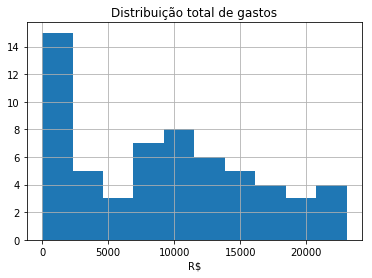

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

# Distribuição total de gastos
df['gasto'].hist()
plt.title(u"Distribuição total de gastos")
plt.xlabel('R$')
plt.show()

# Exemplo: Balas Perdidas

* Quais dessas notícias possuem o termo 'bala perdida'?

* CSV com links para notícias

* Entrada: bit.ly/bala-perdida-csv (salvar como materiais.csv)

In [29]:
import csv, requests

encontrados, nao_encontrados = 0, 0
arquivo = open('Materiais.csv', encoding='utf8')
for materia in csv.DictReader(arquivo):
    link = materia['link']
    print(f'Baixando {link}...')
    resposta = requests.get(link)
    
    if 'bala perdida' in resposta.text.lower():
        print('Termo encontrado! =/')
        encontrados += 1
    else:
        print('Termo não encontrado! o/')
        nao_encontrados += 1
        
print(f'Encontrados: {encontrados}')
print(f'Não encontrados: {nao_encontrados}')

Baixando http://oglobo.globo.com/rio/cadela-vitima-de-bala-perdida-em-confronto-na-serrinha-20742625...
Termo encontrado! =/
Baixando http://g1.globo.com/rio-de-janeiro/noticia/homem-e-morto-em-hotel-em-niteroi-rj-apos-reclamar-de-barulho.ghtml...
Termo não encontrado! o/
Baixando http://oglobo.globo.com/rio/cao-baleado-em-tiroteio-no-jacare-20753397...
Termo encontrado! =/
Baixando http://bandnewsfmrio.com.br/editorias-detalhes/primas-sao-baleadas-em-bento-ribeiro...
Termo encontrado! =/
Baixando http://g1.globo.com/rio-de-janeiro/noticia/morre-adolescente-baleada-durante-tiroteio-no-morro-dos-prazeres-no-rio.ghtml...
Termo encontrado! =/
Baixando http://g1.globo.com/rio-de-janeiro/noticia/crianca-de-2-anos-morre-apos-ser-atingida-por-bala-perdida-na-zona-norte-do-rio.ghtml...
Termo encontrado! =/
Baixando http://extra.globo.com/casos-de-policia/anjo-de-bondade-diz-mae-de-entregador-morto-por-bala-perdida-em-guerra-de-traficantes-no-rio-20812925.html...
Termo encontrado! =/
Baixando h